# Visualized data

In [125]:
%load_ext autoreload
%autoreload 2

import utils
import run
import evaluate

import numpy as np
import torch
import matplotlib.pyplot as plt

config = run.make_config('configs/horizonlstm_default.yaml')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
using cpu


In [172]:
x, y = config['train_datasets'][0][0]

In [173]:
y_pred = config['model'](torch.tensor(x).float())

In [218]:
def plot_trajectories(y_pred, y, delta_p=True, ax=None):
    if delta_p:
        y_pred = np.vstack([[0, 0, 0], np.cumsum(y_pred, axis=0)])
        y = np.vstack([[0, 0, 0], np.cumsum(y, axis=0)])
    if ax is None:
        fig, ax = plt.subplots()
    ax.plot(y_pred[:, 0], y_pred[:, 1], "--", label="gt")
    ax.plot(y[:, 0], y[:, 1], "--", label="pred")
    ax.legend()

def plot_compensated_error_vectors(y_pred, y, points=10, ax=None):
    if points is None:
        points = y_pred.shape[0]
    ce = utils.compensate_error(y_pred, y)
    y_pred = np.vstack([[0, 0, 0], np.cumsum(y_pred, axis=0)])
    y = np.vstack([[0, 0, 0], np.cumsum(y, axis=0)])
    if ax is None:
        fig, ax = plt.subplots()
    ax.plot(y_pred[:points, 0], y_pred[:points, 1], '-o', label='y_pred')  # last point has no comparison since it is from the last predicted output, so no other gt-point to go to
    ax.plot(y[:points + 1, 0], y[:points + 1, 1], '-o', label='y')
    for i in range(points):
        ep = y_pred[i] + ce[i]
        plt.plot([y_pred[i, 0], ep[0]], [y_pred[i, 1], ep[1]])
    ax.legend()

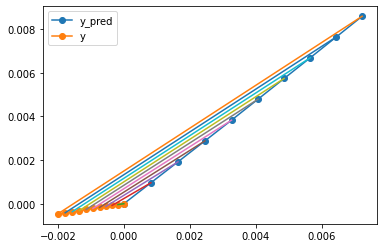

In [219]:
plot_compensated_error_vectors(y + [.001, .001, .001], y)

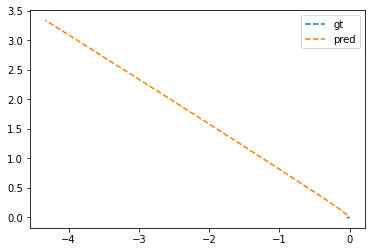

In [215]:
visualize_difference(y_pred.detach().numpy(), y)

In [129]:
ce = utils.compensate_error(y_pred.detach().numpy(), y)

In [130]:
ce.shape

(99, 3)